Load the dataset and Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load pipe-separated file
data_path = r'C:\Users\kalki\OneDrive\Desktop\week3\insurance-risk-analytics-week3\data\MachineLearningRating_v3.csv'
df = pd.read_csv(data_path, sep='|')

# Quick look at data
print(df.shape)
df.head()


C:\Users\kalki\AppData\Local\Temp\ipykernel_18824\386002507.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, sep='|')


(1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


Data Info and Structure

In [7]:
# Check column types, non-null counts
df.info()

# Check column names
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

Descriptive Statistics

In [8]:
# Select numerical columns for stats
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

# Summary stats
df[numerical_cols].describe()


,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,2.255311e+05
std,2.302845e+02,2.384075e+03,5.645157e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,1.350000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.800000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07


Check Missing Values

In [9]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

Univariate Analysis

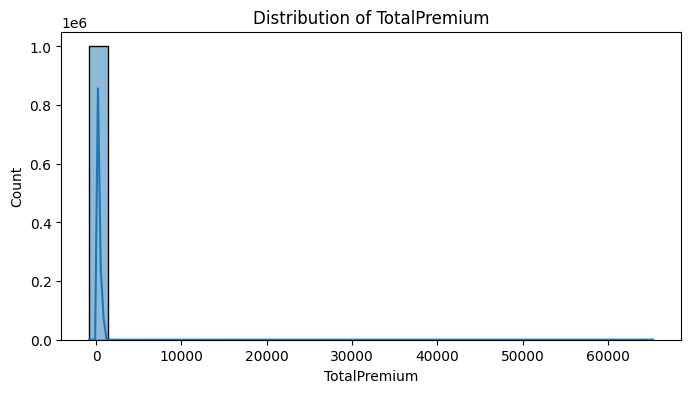

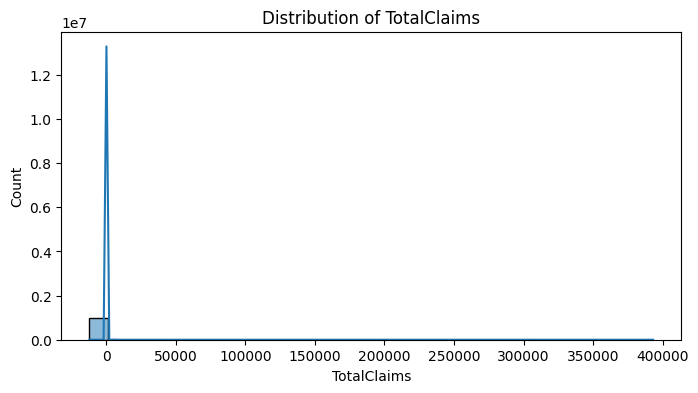

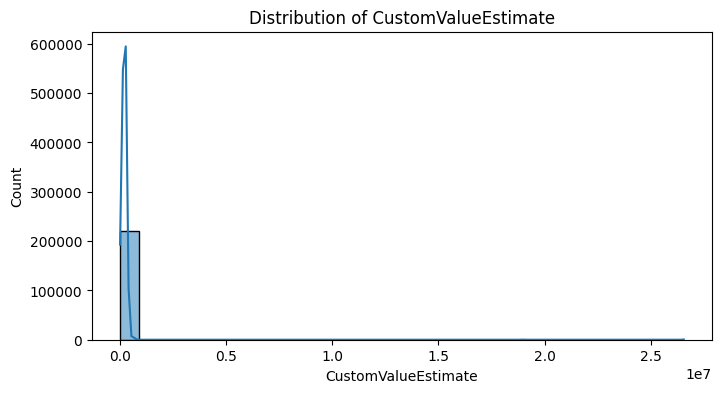

In [11]:
# Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



In [14]:
# Print all column names to inspect
print(df.columns.tolist())


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio']


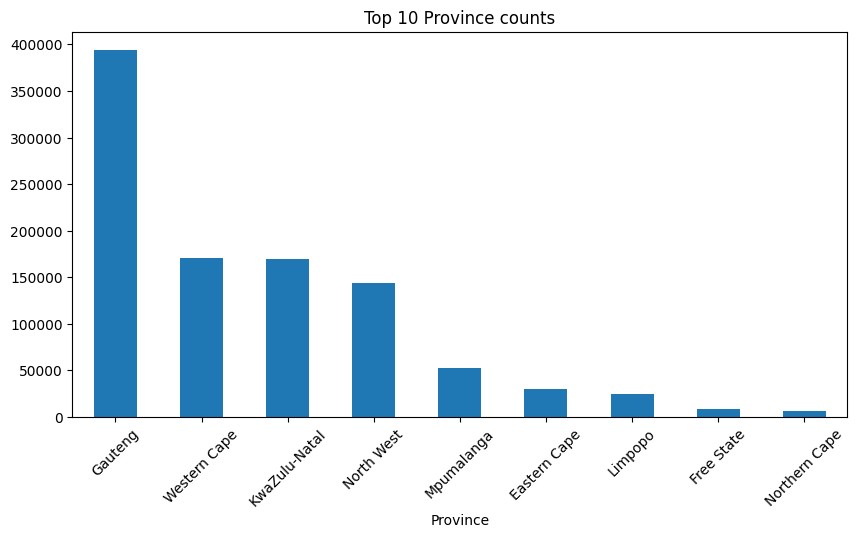

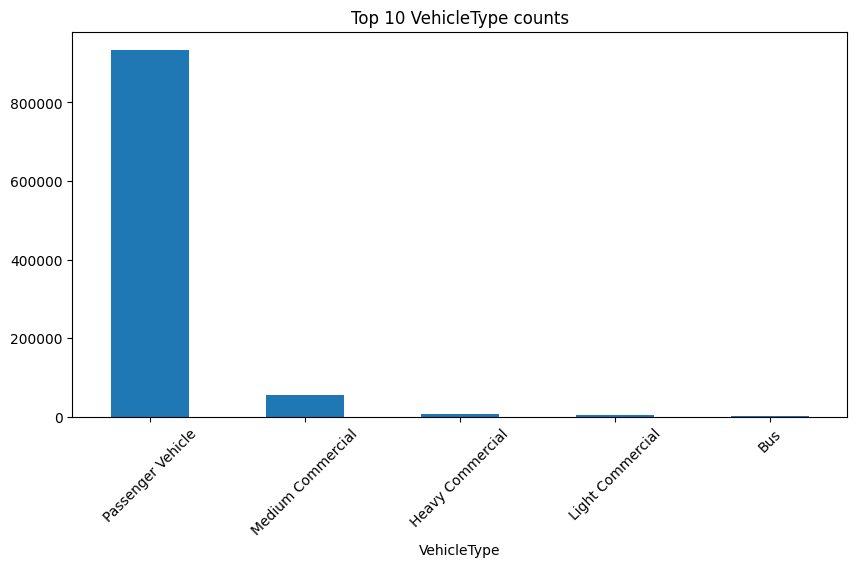

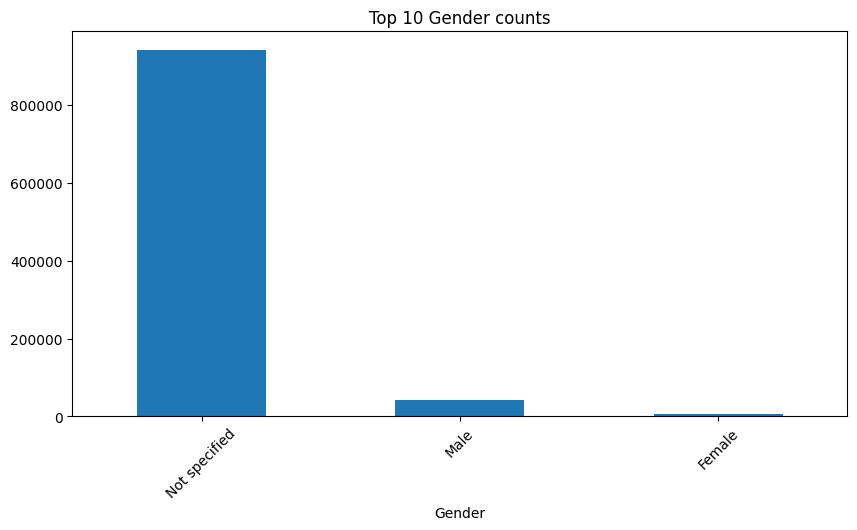

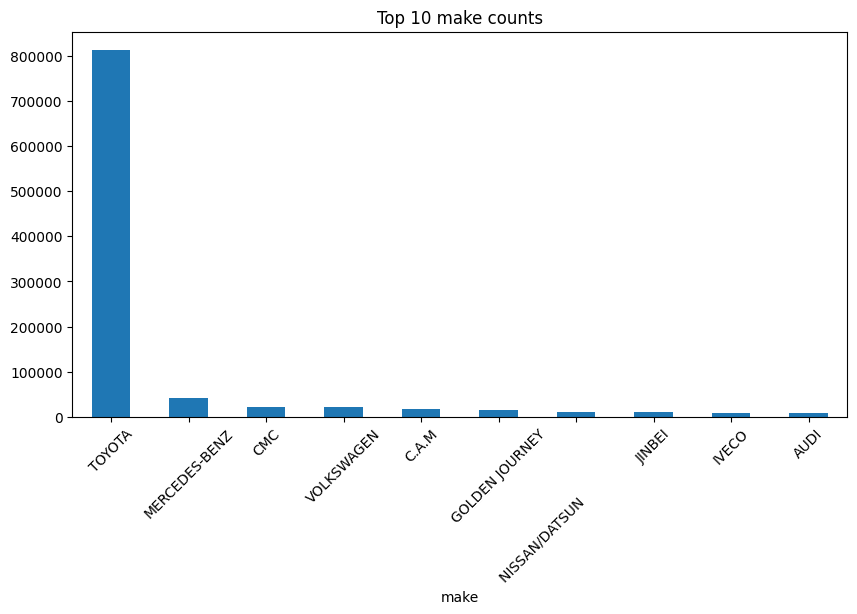

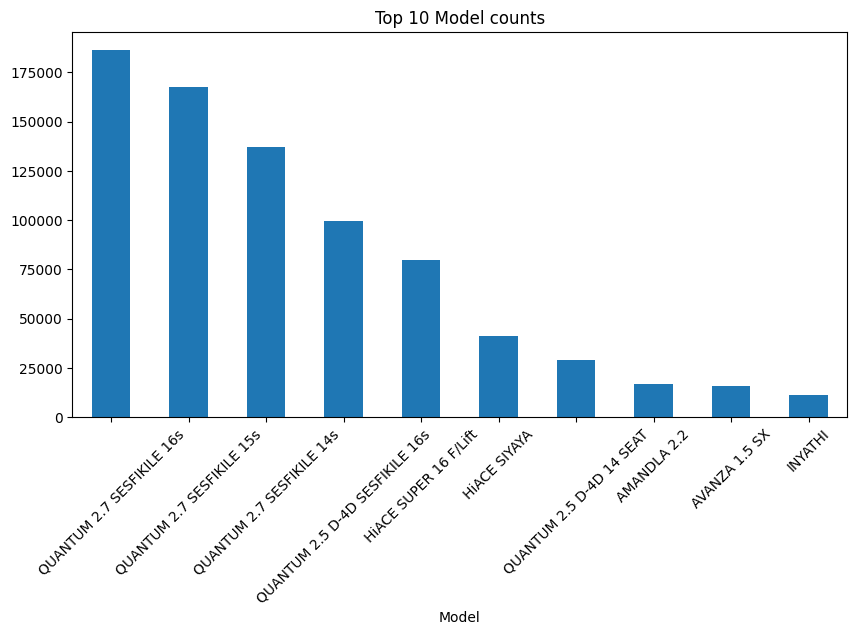

In [15]:
categorical_cols = ['Province', 'VehicleType', 'Gender', 'make', 'Model']  # use 'make' instead of 'Make'
top_n = 10

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(top_n).plot(kind='bar')
    plt.title(f'Top {top_n} {col} counts')
    plt.xticks(rotation=45)
    plt.show()


Loss Ratio Analysis

In [13]:
# Create LossRatio column
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Overall Loss Ratio
overall_loss_ratio = df['LossRatio'].mean()
print(f"Overall Loss Ratio: {overall_loss_ratio:.2f}")

# Loss Ratio by Province, VehicleType, Gender
loss_by_province = df.groupby('Province')['LossRatio'].mean()
loss_by_vehicle = df.groupby('VehicleType')['LossRatio'].mean()
loss_by_gender = df.groupby('Gender')['LossRatio'].mean()

print("Loss Ratio by Province:\n", loss_by_province)
print("Loss Ratio by VehicleType:\n", loss_by_vehicle)
print("Loss Ratio by Gender:\n", loss_by_gender)


c:\Users\kalki\OneDrive\Desktop\week3\insurance-risk-analytics-week3\.venv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Overall Loss Ratio: nan
Loss Ratio by Province:
 Province
Eastern Cape          inf
Free State            inf
Gauteng               NaN
KwaZulu-Natal         inf
Limpopo               inf
Mpumalanga            NaN
North West            inf
Northern Cape    0.203831
Western Cape          inf
Name: LossRatio, dtype: float64
Loss Ratio by VehicleType:
 VehicleType
Bus                       inf
Heavy Commercial          inf
Light Commercial     0.543917
Medium Commercial         inf
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64
Loss Ratio by Gender:
 Gender
Female           inf
Male             inf
Not specified    NaN
Name: LossRatio, dtype: float64


Bivariate / Multivariate Analysis

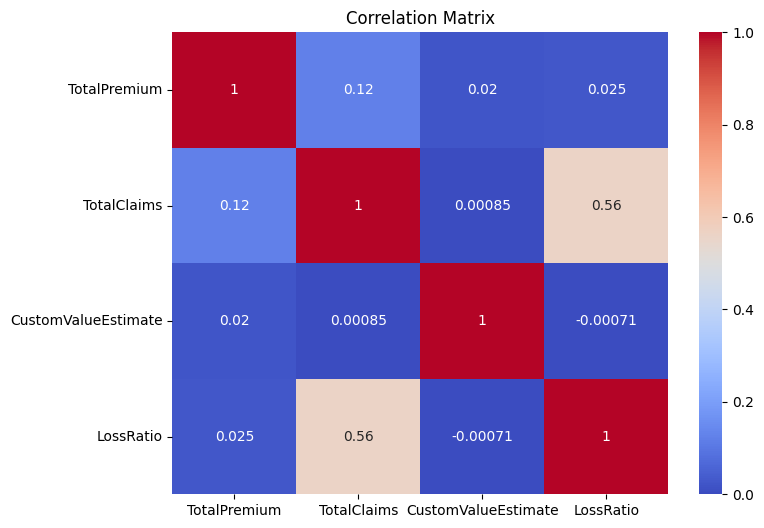

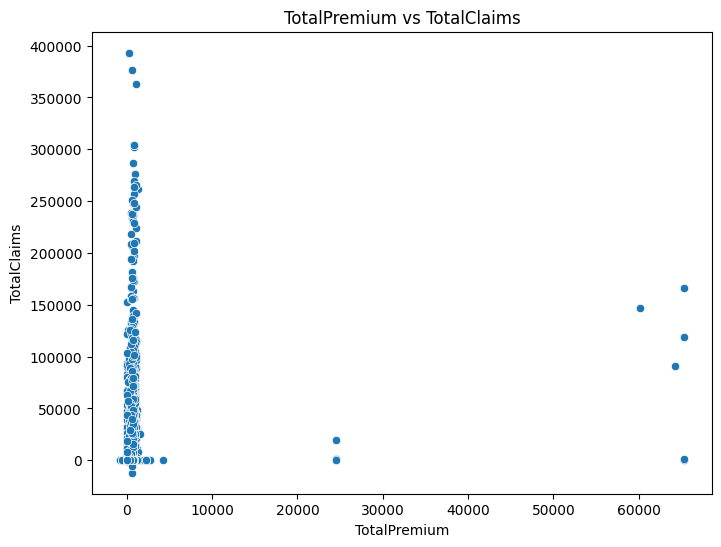

In [16]:
# Correlation matrix for numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols + ['LossRatio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# TotalPremium vs TotalClaims scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.title('TotalPremium vs TotalClaims')
plt.show()


Temporal Trends

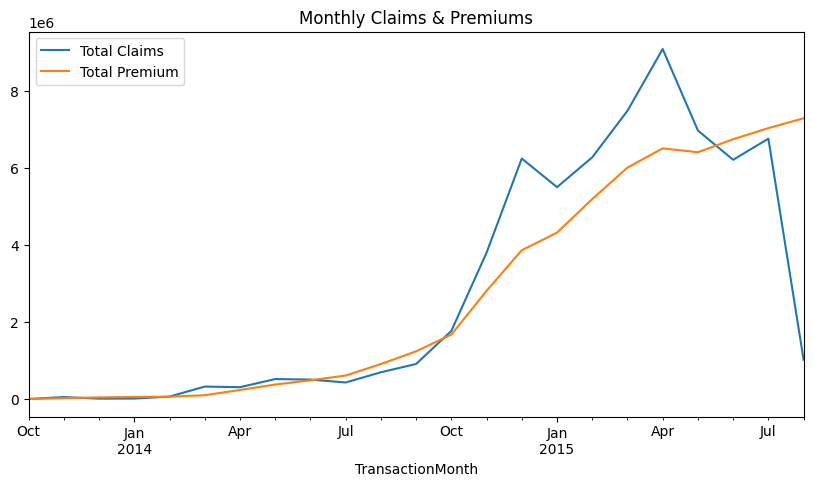

In [17]:
if 'TransactionMonth' in df.columns:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
    monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()
    monthly_premiums = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalPremium'].sum()

    plt.figure(figsize=(10,5))
    monthly_claims.plot(label='Total Claims')
    monthly_premiums.plot(label='Total Premium')
    plt.title('Monthly Claims & Premiums')
    plt.legend()
    plt.show()


Outlier Detection

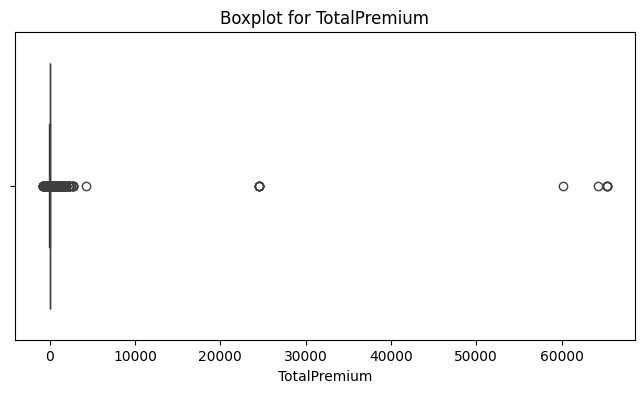

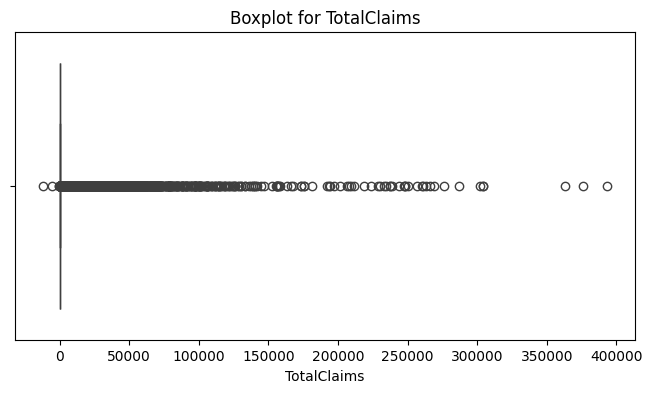

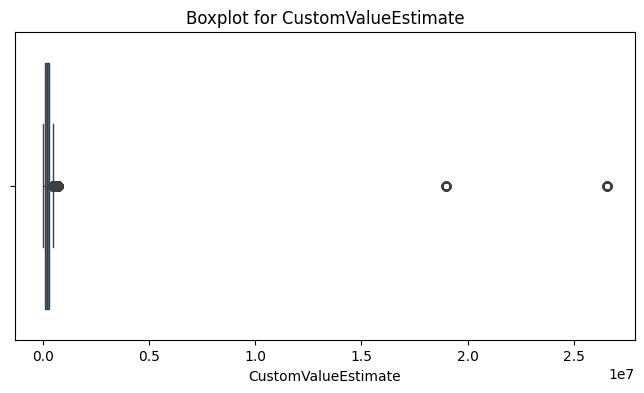

In [18]:
# Boxplots for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


# Creative Insightful Plots

Loss Ratio by Province

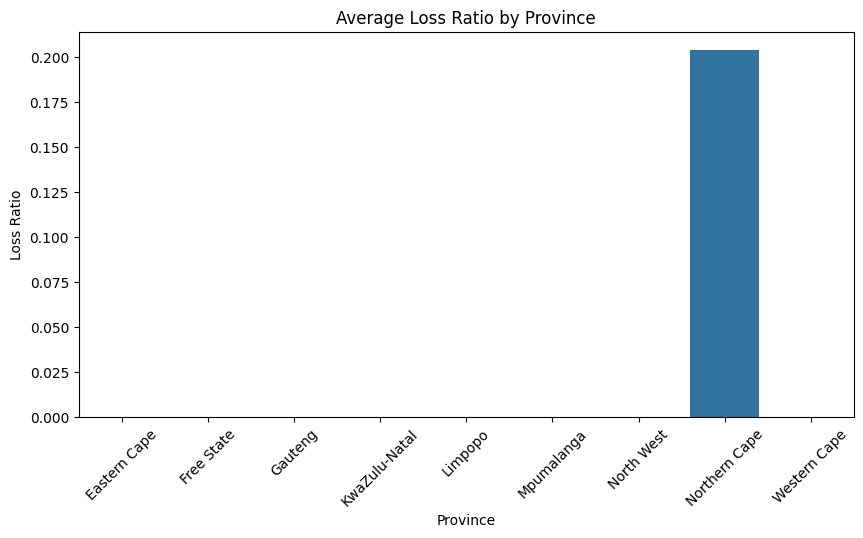

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=loss_by_province.index, y=loss_by_province.values)
plt.title('Average Loss Ratio by Province')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.show()


TotalPremium vs TotalClaims with regression line

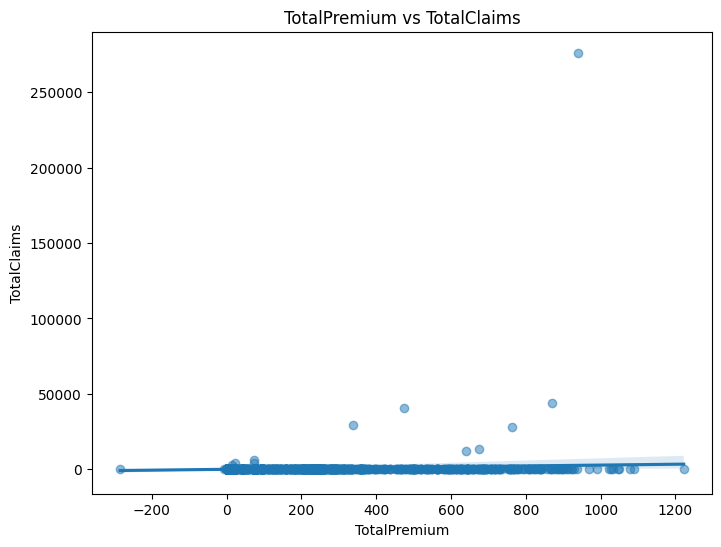

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample 5000 rows for plotting
df_sample = df.sample(n=5000, random_state=42)

plt.figure(figsize=(8,6))
sns.regplot(x='TotalPremium', y='TotalClaims', data=df_sample, scatter_kws={'alpha':0.5})
plt.title('TotalPremium vs TotalClaims')
plt.show()



Distribution of CustomValueEstimate

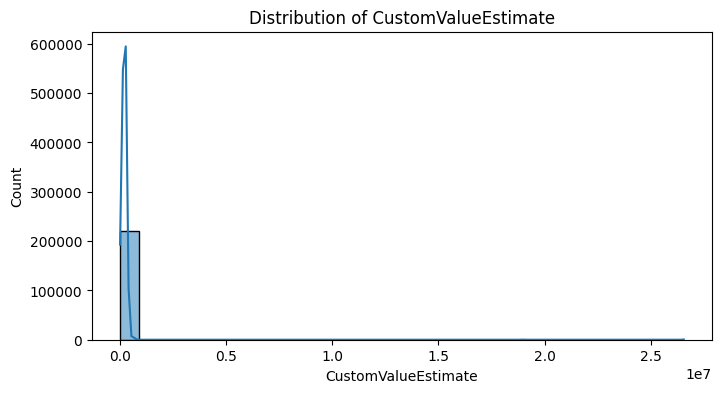

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df['CustomValueEstimate'], bins=30, kde=True)
plt.title('Distribution of CustomValueEstimate')
plt.show()


# Task-1